# Chicago Crime Data Analysis
* Project Group: Christopher Habib, Siddharth Krishnan, Ali Kashani, Elmaddin Karimov
* Created on: March , 2019
* Description: Data exploration and data visualization on Chicago crime dataset from 2001 to present
* Curated dataset: https://dev.socrata.com/foundry/data.cityofchicago.org/6zsd-86xi

In [1]:
## Import necessary packages
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load in the Chicago crime dataset
df = pd.read_csv('resources/Crimes_-_2001_to_present.csv')

### View subset of data

In [3]:
## Print first 5 lines of dataset
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11089469,JA433708,09/16/2017 12:45:00 PM,010XX W 51ST ST,1345,CRIMINAL DAMAGE,TO CITY OF CHICAGO PROPERTY,STREET,False,False,...,16.0,61.0,14,1170427.0,1871001.0,2017,02/10/2018 03:50:01 PM,41.801512,-87.650507,"(41.801512193, -87.650507242)"
1,3043050,HJ754728,11/12/2003 12:45:00 PM,070XX S CRANDON AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,5.0,43.0,08B,1192539.0,1858824.0,2003,02/28/2018 03:56:25 PM,41.767587,-87.569812,"(41.767587038, -87.569812006)"
2,3043051,HJ756159,11/13/2003 07:30:00 AM,045XX W LAKE ST,1330,CRIMINAL TRESPASS,TO LAND,CTA PLATFORM,True,False,...,28.0,26.0,26,1146180.0,1901682.0,2003,02/28/2018 03:56:25 PM,41.886199,-87.738652,"(41.88619916, -87.738651896)"
3,3043052,HJ720983,10/27/2003 11:46:21 AM,050XX W IRVING PARK RD,2028,NARCOTICS,POSS: SYNTHETIC DRUGS,STREET,True,False,...,45.0,15.0,18,1142231.0,1926127.0,2003,02/28/2018 03:56:25 PM,41.953353,-87.752546,"(41.953353003, -87.75254576)"
4,3043053,HJ754620,11/12/2003 12:48:12 PM,043XX W MONROE ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True,...,28.0,26.0,08B,1147544.0,1899310.0,2003,02/28/2018 03:56:25 PM,41.879664,-87.733704,"(41.879664074, -87.733703787)"


In [4]:
## Print last 5 lines of dataset
df.tail()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
6817736,3043045,HJ741507,11/05/2003 08:07:00 PM,042XX W NORTH AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,COMMERCIAL / BUSINESS OFFICE,False,False,...,30.0,23.0,14,1147665.0,1910292.0,2003,02/28/2018 03:56:25 PM,41.909798,-87.732977,"(41.909797546, -87.732977327)"
6817737,3043046,HJ753729,11/12/2003 12:27:39 AM,010XX N RUSH ST,1330,CRIMINAL TRESPASS,TO LAND,TAVERN/LIQUOR STORE,True,False,...,42.0,8.0,26,1176338.0,1907388.0,2003,02/28/2018 03:56:25 PM,41.901230,-87.627733,"(41.90122982, -87.627733001)"
6817738,3043047,HJ741773,11/05/2003 10:06:00 PM,032XX W FULTON BLVD,0460,BATTERY,SIMPLE,STREET,True,False,...,28.0,27.0,08B,1154756.0,1901818.0,2003,02/28/2018 03:56:25 PM,41.886405,-87.707155,"(41.886404954, -87.707155005)"
6817739,3043048,HJ756031,11/13/2003 01:12:01 AM,012XX N CLARK ST,1330,CRIMINAL TRESPASS,TO LAND,GROCERY FOOD STORE,True,False,...,42.0,8.0,26,1175313.0,1908559.0,2003,02/28/2018 03:56:25 PM,41.904466,-87.631463,"(41.904466173, -87.631462688)"
6817740,3043049,HJ732210,11/01/2002 01:50:00 PM,029XX W HARRISON ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,2.0,27.0,08B,1156862.0,1897226.0,2002,02/28/2018 03:56:25 PM,41.873762,-87.699546,"(41.873761627, -87.699545765)"


In [5]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

## What crimes are most prevalent in Chicago?

In [6]:
## Check if any rows are missing data and are null
df['Primary Type'].isnull().values.any()

False

In [7]:
## Count number of observations for each crime
df['Primary Type'].value_counts()
df['Employer'] = df['Employer'].replace(
    {'MOTOR VEHICLE THEFT': 'THEFT', 'ROBBERY': 'THEFT'})


THEFT                                1435247
BATTERY                              1244773
CRIMINAL DAMAGE                       778239
NARCOTICS                             714835
ASSAULT                               423716
OTHER OFFENSE                         423379
BURGLARY                              390929
MOTOR VEHICLE THEFT                   316905
DECEPTIVE PRACTICE                    268057
ROBBERY                               258033
CRIMINAL TRESPASS                     195206
WEAPONS VIOLATION                      72147
PROSTITUTION                           68512
PUBLIC PEACE VIOLATION                 48150
OFFENSE INVOLVING CHILDREN             46028
CRIM SEXUAL ASSAULT                    27667
SEX OFFENSE                            25448
INTERFERENCE WITH PUBLIC OFFICER       15487
GAMBLING                               14433
LIQUOR LAW VIOLATION                   14110
ARSON                                  11252
HOMICIDE                                9553
KIDNAPPING

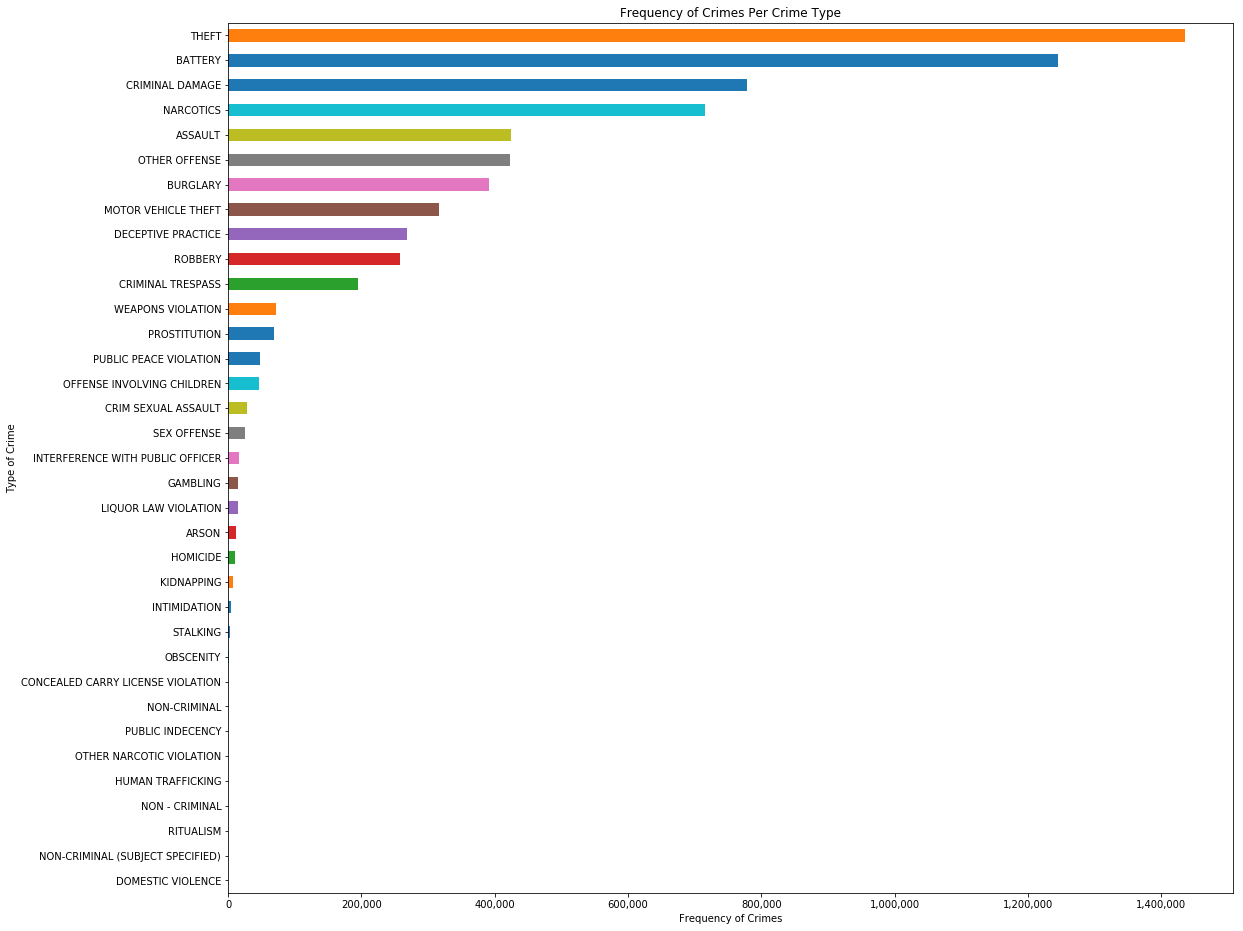

In [8]:
## Plot these for better visualization
crime_type_df = df['Primary Type'].value_counts(ascending=True)

## Some formatting to make it look nicer
fig=plt.figure(figsize=(18, 16))
plt.title("Frequency of Crimes Per Crime Type")
plt.xlabel("Frequency of Crimes")
plt.ylabel("Type of Crime")
ax = crime_type_df.plot(kind='barh')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.savefig("output_data/TypeOFCrime.png")


## What year had the most crime?

In [9]:
## Check if any rows are missing data and are null
df['Year'].isnull().values.any()

False

In [10]:
## Count number of reported crimes for each year
df['Year'].value_counts()

2002    486754
2001    485752
2003    475940
2004    469383
2005    453715
2006    448108
2007    437011
2008    427056
2009    392679
2010    370309
2011    351774
2012    335961
2013    307089
2014    275266
2016    268954
2017    268016
2018    265866
2015    264048
2019     34060
Name: Year, dtype: int64

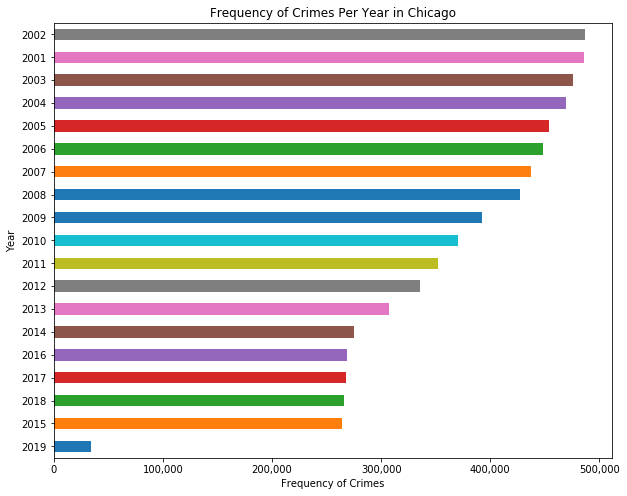

In [11]:
## Plot these for better visualization
crime_year_df = df['Year'].value_counts(ascending=True)

## Some formatting to make it look nicer
fig=plt.figure(figsize=(10, 8))
plt.title("Frequency of Crimes Per Year in Chicago")
plt.xlabel("Frequency of Crimes")
plt.ylabel("Year")
ax = crime_year_df.plot(kind='barh')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.savefig("output_data/FrequencyOfCrimesPerYear.png")

## What percentage of arrests were successful?

In [12]:
## Check if any rows are missing data and are null
df['Arrest'].isnull().values.any()

False

In [13]:
## Count number of successful arrests for each year
df['Arrest'].value_counts()

False    4931296
True     1886445
Name: Arrest, dtype: int64

In [14]:
## Convert values into percentages
arrest_df = df['Arrest'].value_counts()
arrest_percent = (arrest_df / df['Arrest'].sum()) * 100 

## Rename Series.name
arrest_percent.rename("% of Arrests",inplace=True)

## Rename True and False to % Arrested and % Not Arrested
arrest_percent.rename({True: '% Arrested', False: '% Not Arrested'},inplace=True)

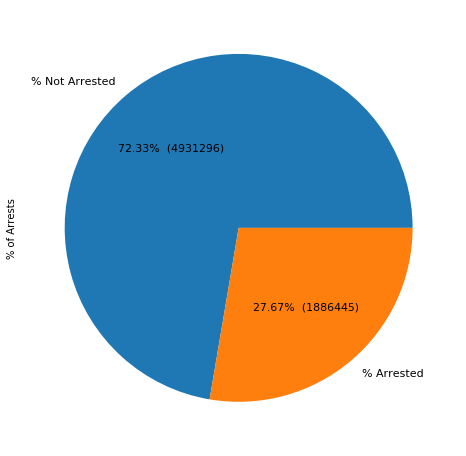

In [15]:
## Format pie chart to nicely show percentage and count
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

## Plot results in a pie chart
arrest_percent.plot.pie(fontsize=11,
                       autopct=make_autopct(df['Arrest'].value_counts()),
                       figsize=(8, 8))
plt.savefig("output_data/PercentageOfArrests.png")


## What are the successful arrest percentages per year?

In [16]:
## Group dataset by year and arrests
arrest_per_year = df.groupby('Year')['Arrest'].value_counts().rename('Counts').to_frame()
arrest_per_year['Percentage'] = (100 * arrest_per_year / arrest_per_year.groupby(level=0).sum())
arrest_per_year.reset_index(level=[1],inplace=True)
arrest_per_year

,Arrest,Counts,Percentage
Year,,,
2001,False,343850,70.787151
2001,True,141902,29.212849
2002,False,345201,70.918986
2002,True,141553,29.081014
2003,False,334368,70.254234
2003,True,141572,29.745766
2004,False,324697,69.175279
2004,True,144686,30.824721
2005,False,312820,68.946365


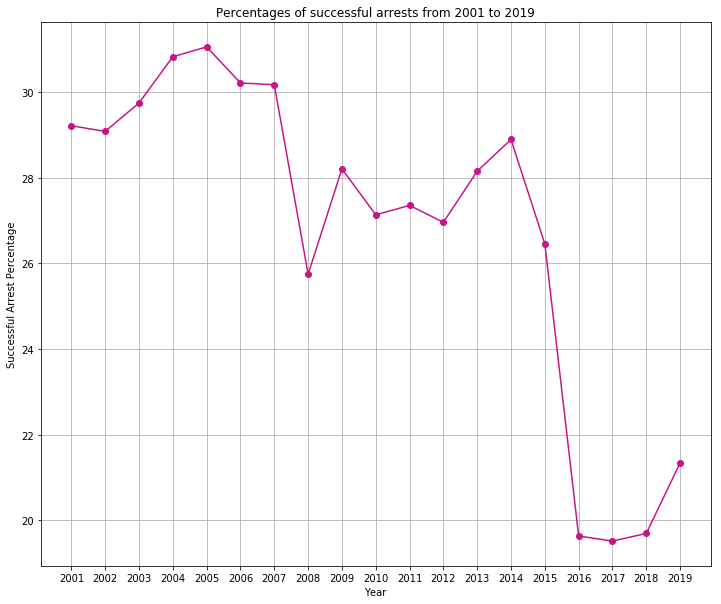

In [17]:
## Create a line plot for percentages of successful arrests over time (2001 to present)
line_plot = arrest_per_year[arrest_per_year['Arrest'] == True]['Percentage']

## Configure line plot to make visualizing data cleaner
labels = line_plot.index.values
fig=plt.figure(figsize=(12, 10))
plt.title('Percentages of successful arrests from 2001 to 2019')
plt.xlabel("Year")
plt.ylabel("Successful Arrest Percentage")
plt.xticks(line_plot.index, line_plot.index.values)

line_plot.plot(grid=True, marker='o', color='mediumvioletred')
plt.savefig("output_data/SuccessfulArrest.png")


## Data visualization for crimes commited since this month started

In [18]:
import datetime

## Clean data, create copy, and filter based on this month (March 2019)
cleaned_df = df[df['Latitude'].notnull() & df['Longitude'].notnull()].copy()
cleaned_df['Date Time'] = pd.to_datetime(cleaned_df['Date'], format='%m/%d/%Y %I:%M:%S %p')
cleaned_df = cleaned_df[cleaned_df['Date Time']  > datetime.datetime(2019, 2, 28)]
print("Number of crimes in Chicago since start of March 2019: %d" % len(cleaned_df))

Number of crimes in Chicago since start of March 2019: 0


## Data visualization for crimes based on district from 2001 to present

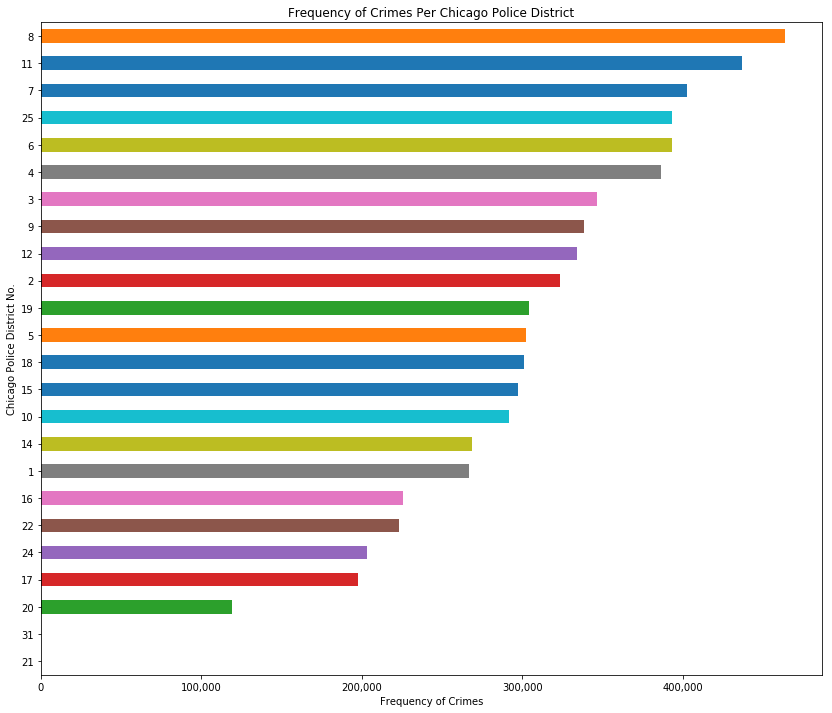

In [19]:
# calculating total number of incidents per district
district_crime = df['District'].value_counts(ascending=True)

## Data cleaning
district_crime.index = district_crime.index.astype(int)
district_crime.index = district_crime.index.astype(str)

## Plot bar graph for initial visualization
fig=plt.figure(figsize=(14, 12))
plt.title("Frequency of Crimes Per Chicago Police District")
plt.xlabel("Frequency of Crimes")
plt.ylabel("Chicago Police District No.")
ax = district_crime.plot(kind='barh')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.savefig("output_data/FrequencyOfCrimesPerPolisDist.png")


In [20]:
census = pd.read_csv("Census_Data_-_Selected_socioeconomic_indicators_in_Chicago__2008___2012.csv")

In [137]:
df['Primary Type'].value_counts()
df['Primary Type'] = df['Primary Type'].replace(
    {'MOTOR VEHICLE THEFT': 'THEFT', 'ROBBERY': 'THEFT'})
df["Primary Type"].value_counts()

THEFT                                2010185
BATTERY                              1244773
CRIMINAL DAMAGE                       778239
NARCOTICS                             714835
ASSAULT                               423716
OTHER OFFENSE                         423379
BURGLARY                              390929
DECEPTIVE PRACTICE                    268057
CRIMINAL TRESPASS                     195206
WEAPONS VIOLATION                      72147
PROSTITUTION                           68512
PUBLIC PEACE VIOLATION                 48150
OFFENSE INVOLVING CHILDREN             46028
CRIM SEXUAL ASSAULT                    27667
SEX OFFENSE                            25448
INTERFERENCE WITH PUBLIC OFFICER       15487
GAMBLING                               14433
LIQUOR LAW VIOLATION                   14110
ARSON                                  11252
HOMICIDE                                9553
KIDNAPPING                              6706
INTIMIDATION                            3989
STALKING  

In [138]:
census = census.rename(columns={"Community Area Number":"Community Area"})
census.head()
crime08 = df.loc[df["Year"]==2008]
#crime12 = df.loc[df["Year"]==2012]


crime08



,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
3966,11100210,JA447501,01/01/2008 12:00:00 PM,103XX S GREEN ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,34.0,73.0,11,NaN,NaN,2008,09/27/2017 03:48:40 PM,NaN,NaN,NaN
4155,11100336,JA447427,02/02/2008 12:01:00 AM,023XX N KENNETH AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,False,False,...,31.0,20.0,11,NaN,NaN,2008,09/28/2017 03:46:23 PM,NaN,NaN,NaN
7416,11103371,JA451486,08/01/2008 12:01:00 AM,063XX S INGLESIDE AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,STREET,False,False,...,20.0,42.0,11,NaN,NaN,2008,09/30/2017 03:47:16 PM,NaN,NaN,NaN
10988,11108818,JA457217,10/20/2008 12:00:00 AM,068XX S ADA ST,1751,OFFENSE INVOLVING CHILDREN,CRIM SEX ABUSE BY FAM MEMBER,RESIDENCE,False,False,...,17.0,67.0,20,NaN,NaN,2008,10/05/2017 03:52:30 PM,NaN,NaN,NaN
17554,11116416,JA467695,01/01/2008 12:01:00 AM,082XX S MARSHFIELD AVE,1754,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,False,False,...,21.0,71.0,02,NaN,NaN,2008,10/13/2017 03:47:46 PM,NaN,NaN,NaN
18359,11117825,JA470268,05/13/2008 09:00:00 AM,050XX W NELSON ST,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,...,31.0,19.0,17,NaN,NaN,2008,10/14/2017 03:46:27 PM,NaN,NaN,NaN
33627,11136286,JA493165,01/01/2008 09:00:00 AM,014XX W RANDOLPH ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESTAURANT,False,False,...,27.0,28.0,11,NaN,NaN,2008,11/02/2017 04:10:19 PM,NaN,NaN,NaN
39351,11143997,JA504451,01/01/2008 12:01:00 AM,053XX S KILDARE AVE,1754,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,False,False,...,23.0,62.0,02,NaN,NaN,2008,11/09/2017 03:50:25 PM,NaN,NaN,NaN
51694,11158415,JA523389,09/01/2008 09:35:00 AM,095XX S HALSTED ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,21.0,73.0,11,NaN,NaN,2008,11/25/2017 03:53:18 PM,NaN,NaN,NaN
55480,11163570,JA530421,09/01/2008 09:00:00 PM,016XX N LUNA AVE,0266,CRIM SEXUAL ASSAULT,PREDATORY,APARTMENT,True,True,...,37.0,25.0,02,NaN,NaN,2008,06/04/2018 03:57:40 PM,NaN,NaN,NaN


In [139]:
crime09 = df.loc[df["Year"]==2009]


In [140]:
crime10 = df.loc[df["Year"]==2010]


In [141]:
crime11 = df.loc[df["Year"]==2011]


In [142]:
crime12 = df.loc[df["Year"]==2012]


In [143]:
crime_data=pd.merge(crime08,census,on="Community Area")
#crime_data1=pd.merge(crime09,census,on="Community Area")
#crime_data2=pd.merge(crime10,census,on="Community Area")
#crime_data3=pd.merge(crime11,census,on="Community Area")
#crime_data4=pd.merge(crime12,census,on="Community Area")

crime_data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Longitude,Location,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,11100210,JA447501,01/01/2008 12:00:00 PM,103XX S GREEN ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,NaN,NaN,Washington Height,1.1,16.9,20.8,13.7,42.6,19713,48.0
1,11158415,JA523389,09/01/2008 09:35:00 AM,095XX S HALSTED ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,NaN,NaN,Washington Height,1.1,16.9,20.8,13.7,42.6,19713,48.0
2,5992060,HP101193,01/01/2008 09:00:00 AM,091XX S HALSTED ST,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,...,-87.643391,"(41.728032252, -87.643391254)",Washington Height,1.1,16.9,20.8,13.7,42.6,19713,48.0
3,5992135,HP101743,01/02/2008 12:00:00 AM,005XX W 95TH ST,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,True,...,-87.637527,"(41.721536767, -87.637526609)",Washington Height,1.1,16.9,20.8,13.7,42.6,19713,48.0
4,5992236,HP101550,01/01/2008 09:35:00 PM,010XX W 92ND ST,2024,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,False,...,-87.649034,"(41.726869474, -87.649034262)",Washington Height,1.1,16.9,20.8,13.7,42.6,19713,48.0


In [144]:
crime_data4=pd.merge(crime12,census,on="Community Area")

In [145]:
crime_data1=pd.merge(crime09,census,on="Community Area")

In [146]:
crime_data2=pd.merge(crime10,census,on="Community Area")

In [147]:
crime_data3=pd.merge(crime11,census,on="Community Area")

In [153]:
crime2=pd.concat([crime_data1,crime_data2,crime_data3,crime_data4,crime_data])
crime2.columns

theft=crime2.loc[crime2["Primary Type"]=="THEFT"]
theft

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Longitude,Location,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
5,6686224,HR100853,01/01/2009 11:52:00 AM,021XX E 71ST ST,0860,THEFT,RETAIL THEFT,GROCERY FOOD STORE,True,False,...,-87.573539,"(41.766102387, -87.573539169)",South Shore,2.8,31.1,20.0,14.0,35.7,19398,55.0
12,6686511,HR101296,01/01/2009 02:00:00 PM,016XX E 78TH ST,0910,THEFT,AUTOMOBILE,STREET,False,False,...,-87.585227,"(41.753313825, -87.585226948)",South Shore,2.8,31.1,20.0,14.0,35.7,19398,55.0
14,6686989,HR101346,01/01/2009 07:30:00 PM,014XX E 75TH ST,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,False,False,...,-87.589192,"(41.758737609, -87.589191963)",South Shore,2.8,31.1,20.0,14.0,35.7,19398,55.0
16,6687025,HR101800,01/01/2009 04:00:00 PM,023XX E 70TH PL,0810,THEFT,OVER $500,STREET,False,False,...,-87.569392,"(41.767134183, -87.569392162)",South Shore,2.8,31.1,20.0,14.0,35.7,19398,55.0
19,6687330,HR101460,01/01/2009 09:25:00 PM,016XX E 67TH ST,0320,THEFT,STRONGARM - NO WEAPON,SIDEWALK,False,False,...,-87.584650,"(41.773351649, -87.584649543)",South Shore,2.8,31.1,20.0,14.0,35.7,19398,55.0
22,6687479,HR101902,01/01/2009 01:00:00 PM,073XX S CONSTANCE AVE,0915,THEFT,"TRUCK, BUS, MOTOR HOME",STREET,False,False,...,-87.580497,"(41.761938446, -87.580497454)",South Shore,2.8,31.1,20.0,14.0,35.7,19398,55.0
28,6687875,HR102627,01/01/2009 01:00:00 AM,078XX S BENNETT AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,False,...,-87.578454,"(41.752734384, -87.578453772)",South Shore,2.8,31.1,20.0,14.0,35.7,19398,55.0
29,6687949,HR102491,01/01/2009 10:30:00 PM,018XX E 72ND ST,0820,THEFT,$500 AND UNDER,STREET,False,False,...,-87.580928,"(41.764284895, -87.580928208)",South Shore,2.8,31.1,20.0,14.0,35.7,19398,55.0
33,6688462,HR102880,01/02/2009 07:05:00 PM,077XX S COLES AVE,0320,THEFT,STRONGARM - NO WEAPON,SIDEWALK,False,False,...,-87.554390,"(41.755853192, -87.554389555)",South Shore,2.8,31.1,20.0,14.0,35.7,19398,55.0
35,6688539,HR101897,01/02/2009 09:30:00 AM,019XX E 71ST PL,0820,THEFT,$500 AND UNDER,STREET,False,False,...,-87.577086,"(41.765286035, -87.577086035)",South Shore,2.8,31.1,20.0,14.0,35.7,19398,55.0


In [154]:
theft["PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA"].max()

54.8

In [155]:
theft["PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA"].min()

2.5

In [169]:
# Create the bins in which Data will be held
# Bins are 0, 60, 70, 80, 90, 100
bins = [0, 5, 10, 15, 20, 25,30,35,40,45,50,55]

# Create the names for the four bins
group_names = ["0-5%", "5-10%", "10-15%", "15-20%", "20-25%","25-30%","30-35%","35-40%","40-45%","45-50%","50-55%"]

theft["High School Graduate Percentage"] = pd.cut(theft["PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA"], bins, labels=group_names)
a=theft["High School Graduate Percentage"].value_counts()/1000


a1=pd.DataFrame(a.sort_index())
#c1=pd.DataFrame(c1)
a1

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,High School Graduate Percentage
0-5%,99.358
5-10%,33.626
10-15%,118.199
15-20%,83.236
20-25%,78.196
25-30%,51.724
30-35%,30.704
35-40%,29.352
40-45%,17.390
45-50%,5.033


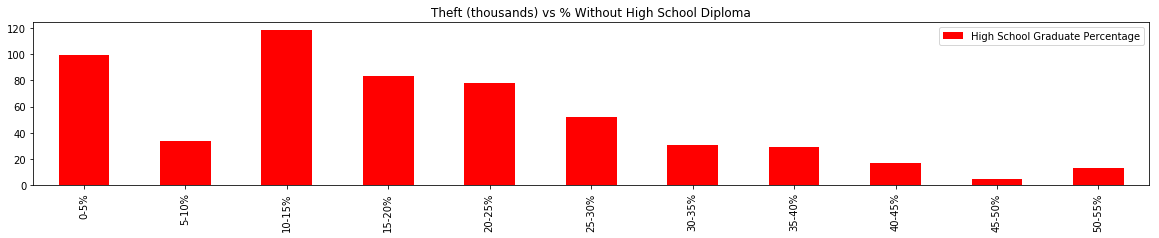

In [170]:
a1.plot(kind="bar", figsize=(20,3),color='r')

# Set a title for the chart
plt.title("Theft (thousands) vs % Without High School Diploma")

plt.show()

In [167]:
theft["PERCENT AGED 16+ UNEMPLOYED"].max()

35.9

In [168]:
theft["PERCENT AGED 16+ UNEMPLOYED"].min()

4.7

In [171]:
# Create the bins in which Data will be held
# Bins are 0, 60, 70, 80, 90, 100
bins = [0, 5, 10, 15, 20, 25,30,35,40]

# Create the names for the four bins
group_names = ["0-5%", "5-10%", "10-15%", "15-20%", "20-25%","25-30%","30-35%","35-40%"]

theft["Unemployment %"] = pd.cut(theft["PERCENT AGED 16+ UNEMPLOYED"], bins, labels=group_names)
b=theft["Unemployment %"].value_counts()/1000

b1=pd.DataFrame(b.sort_index())
#c1=pd.DataFrame(c1)
b1

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Unemployment %
0-5%,22.524
5-10%,194.910
10-15%,74.250
15-20%,106.816
20-25%,108.321
25-30%,37.502
30-35%,3.173
35-40%,12.963


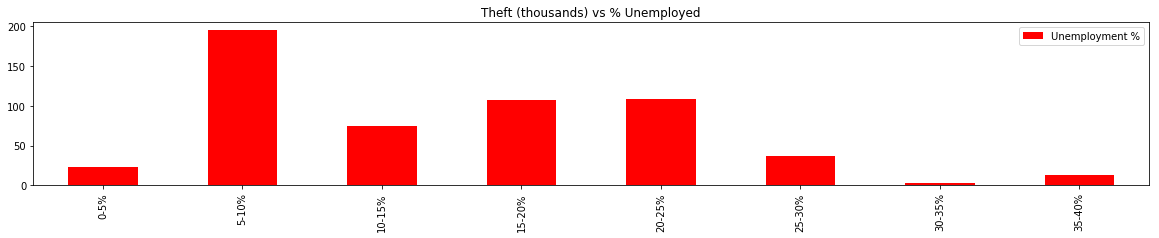

In [172]:
b1.plot(kind="bar", figsize=(20,3),color='r')

# Set a title for the chart
plt.title("Theft (thousands) vs % Unemployed")

plt.show()

In [173]:
theft["PERCENT HOUSEHOLDS BELOW POVERTY"].max()

56.5

In [174]:
theft["PERCENT HOUSEHOLDS BELOW POVERTY"].min()

3.3

In [159]:
# Create the bins in which Data will be held
# Bins are 0, 60, 70, 80, 90, 100
bins = [0, 5, 10, 15, 20, 25,30,35,40,45,50,55,60]

# Create the names for the four bins
group_names = ["0-5%", "5-10%", "10-15%", "15-20%", "20-25%","25-30%","30-35%","35-40%","40-45%","45-50%","50-55%","55-60%"]

theft["% Houses Under Poverty"] = pd.cut(theft["PERCENT HOUSEHOLDS BELOW POVERTY"], bins, labels=group_names)
c=theft["% Houses Under Poverty"].value_counts()
c_df = pd.DataFrame(c)

c_df["relative"]=c_df["% Houses Under Poverty"]/1000
c1=pd.DataFrame(c_df["relative"].sort_index())
#c1=pd.DataFrame(c1)
c1

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,relative
0-5%,1.667
5-10%,18.324
10-15%,159.886
15-20%,96.147
20-25%,57.111
25-30%,120.416
30-35%,57.452
35-40%,1.075
40-45%,33.246
45-50%,11.962


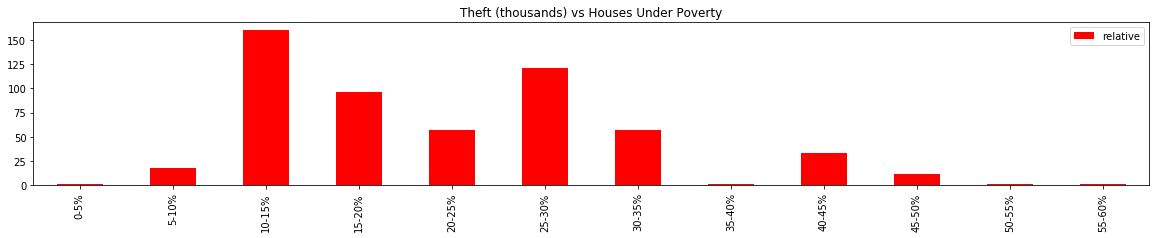

In [162]:
c1.plot(kind="bar", figsize=(20,3),color='r')

# Set a title for the chart
plt.title("Theft (thousands) vs Houses Under Poverty")

plt.show()

In [175]:
theft["PERCENT OF HOUSING CROWDED"].max()

15.8

In [176]:
theft["PERCENT OF HOUSING CROWDED"].min()

0.3

In [181]:
# Create the bins in which Data will be held
# Bins are 0, 60, 70, 80, 90, 100
bins = [0, 4,8,12,16]

# Create the names for the four bins
group_names = ["0-4%", "4-8%", "8-12%", "12-16%", ]

theft["% Crowded Housing"] = pd.cut(theft["PERCENT OF HOUSING CROWDED"], bins, labels=group_names)
d=theft["% Crowded Housing"].value_counts()/1000

d1 = pd.DataFrame(d)
d1


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,% Crowded Housing
0-4%,332.288
4-8%,144.309
8-12%,51.899
12-16%,31.963


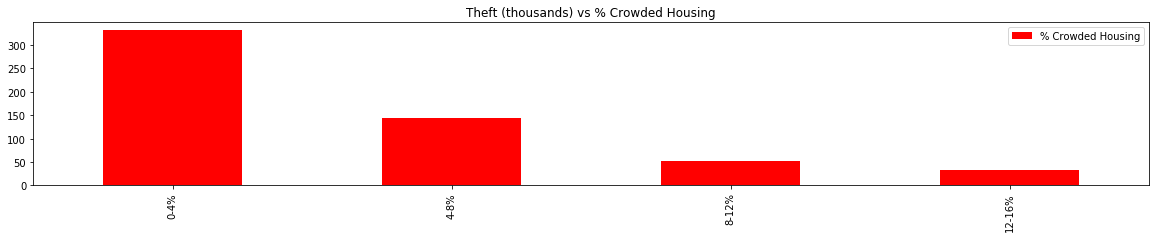

In [182]:
d1.plot(kind="bar", figsize=(20,3),color='r')

# Set a title for the chart
plt.title("Theft (thousands) vs % Crowded Housing")

plt.show()

In [183]:
theft["PER CAPITA INCOME "].max()

88669

In [184]:
theft["PER CAPITA INCOME "].min()

8201

In [186]:
# Create the bins in which Data will be held
# Bins are 0, 60, 70, 80, 90, 100
bins = [0, 10000,20000,30000,40000,50000,60000,70000,80000,90000]

# Create the names for the four bins
group_names = ["0-10,000", "10,000-20,000", "20,000-30,000", "30,000-40,000","40,000-50,000","50,000-60,000","60,000-70,000","70,000-80,000","80,000-90,000" ]

theft["Per Capita Income Bracket"] = pd.cut(theft["PER CAPITA INCOME "], bins, labels=group_names)
e=theft["Per Capita Income Bracket"].value_counts()/1000
e1=pd.DataFrame(e.sort_index())
e1

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Per Capita Income Bracket
"0-10,000",1.273
"10,000-20,000",273.766
"20,000-30,000",94.125
"30,000-40,000",49.528
"40,000-50,000",47.298
"50,000-60,000",8.993
"60,000-70,000",40.758
"70,000-80,000",15.522
"80,000-90,000",29.196


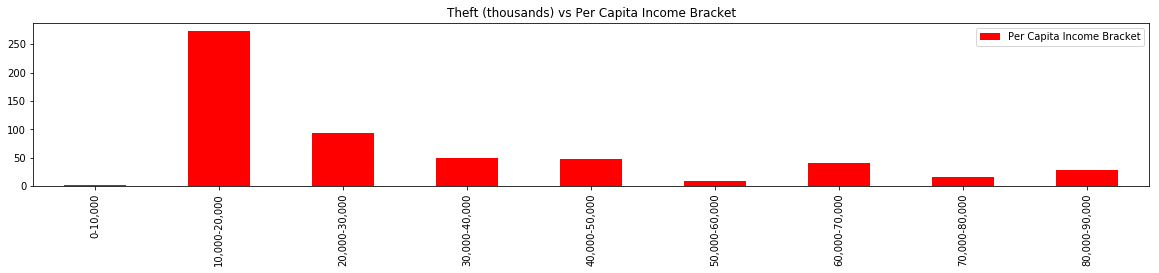

In [188]:
e1.plot(kind="bar", figsize=(20,3),color='r')

# Set a title for the chart
plt.title("Theft (thousands) vs Per Capita Income Bracket")

plt.show()

In [189]:
theft['HARDSHIP INDEX'].max()

98.0

In [190]:
theft['HARDSHIP INDEX'].min()

1.0

In [191]:
# Create the bins in which Data will be held
# Bins are 0, 60, 70, 80, 90, 100
bins = [0, 10,20,30,40,50,60,70,80,90,100]

# Create the names for the four bins
group_names = ["0-10", "10-20", "20-30", "30-40","40-50","50-60","60-70","70-80","80-90","90-100" ]

crime2["Hardship Bracket"] = pd.cut(crime2['HARDSHIP INDEX'], bins, labels=group_names)
f=crime2["Hardship Bracket"].value_counts()/1000
f1=pd.DataFrame(f.sort_index())
f1

,Hardship Bracket
0-10,247.906
10-20,132.678
20-30,111.649
30-40,123.577
40-50,111.349
50-60,250.097
60-70,160.882
70-80,299.701
80-90,250.561
90-100,188.494


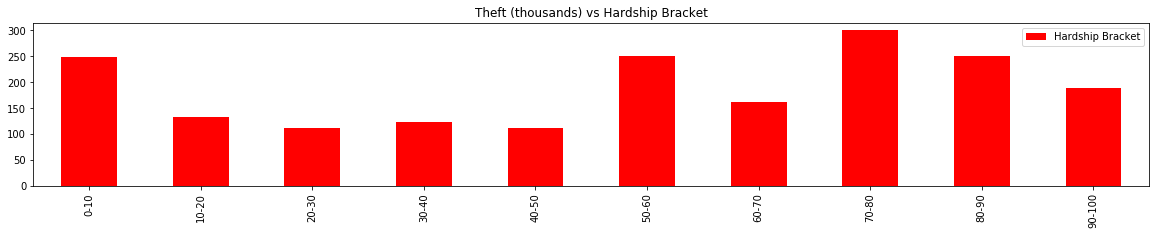

In [193]:
f1.plot(kind="bar", figsize=(20,3),color='r')

# Set a title for the chart
plt.title("Theft (thousands) vs Hardship Bracket")

plt.show()

In [37]:
grouped = merged_pd.groupby("Community Area")
grouped.count()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Longitude,Location,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
Community Area,,,,,,,,,,,,,,,,,,,,,
1.0,95048,95048,95048,95048,95048,95048,95048,94978,95048,95048,...,94179,94179,95048,95048,95048,95048,95048,95048,95048,95048
2.0,77413,77413,77413,77413,77413,77413,77413,77359,77413,77413,...,76816,76816,77413,77413,77413,77413,77413,77413,77413,77413
3.0,90819,90819,90819,90819,90819,90819,90819,90674,90819,90819,...,90020,90020,90819,90819,90819,90819,90819,90819,90819,90819
4.0,43449,43449,43449,43449,43449,43449,43449,43376,43449,43449,...,43134,43134,43449,43449,43449,43449,43449,43449,43449,43449
5.0,37226,37226,37226,37226,37226,37226,37226,37143,37226,37226,...,36920,36920,37226,37226,37226,37226,37226,37226,37226,37226
6.0,122877,122877,122877,122877,122877,122877,122877,122586,122877,122877,...,121698,121698,122877,122877,122877,122877,122877,122877,122877,122877
7.0,97233,97233,97233,97233,97233,97233,97233,97024,97233,97233,...,96378,96378,97233,97233,97233,97233,97233,97233,97233,97233
8.0,212358,212358,212358,212358,212358,212358,212358,212026,212358,212358,...,210138,210138,212358,212358,212358,212358,212358,212358,212358,212358
9.0,5995,5995,5995,5995,5995,5995,5995,5985,5995,5995,...,5926,5926,5995,5995,5995,5995,5995,5995,5995,5995
